In [71]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import sys

plt.style.use("../matplotlib_style/standard_plot_style.mplstyle")

import qutip

%matplotlib inline

save_figures = False
save_path    = "/mnt/c/Users/johan/OneDrive/Skrivebord/Master_Thesis/Figs/Dispersive_Simulations"

sys.path.append("../utils")


In [72]:
# Setup resonator
resonator_states        = 20
resonator_frequency     = 6.02 * 2 * np.pi    

# Setup drive
drive_amplitude        = 0.002
driving_time           = (0, 2000)
simulation_steps       = 2001
drive_frequency        = 6.02 * 2 * np.pi + 0.001
drive_function         = lambda t, args: drive_amplitude * np.cos(args["driving_frequency"] * t)

binwidth = (driving_time[1] - driving_time[0]) / simulation_steps

# Setup the operators
from qutip import destroy
a       = destroy(resonator_states)
a_dag   = a.dag()

H = (resonator_frequency - drive_frequency)* a_dag * a

H += drive_amplitude * (a_dag + a)

In [73]:
# Operators to follow the evolution of the system
n = a_dag * a
I = (a_dag + a) / np.sqrt(2)
Q = 1j * (a_dag - a) / np.sqrt(2)


from qutip import mesolve, smesolve, ket2dm
# Setup the solver
rho0 = ket2dm(qutip.basis(resonator_states, 0))

# Solve the system
result = mesolve(H, rho0, np.linspace(*driving_time, simulation_steps), [], [n, I, Q])


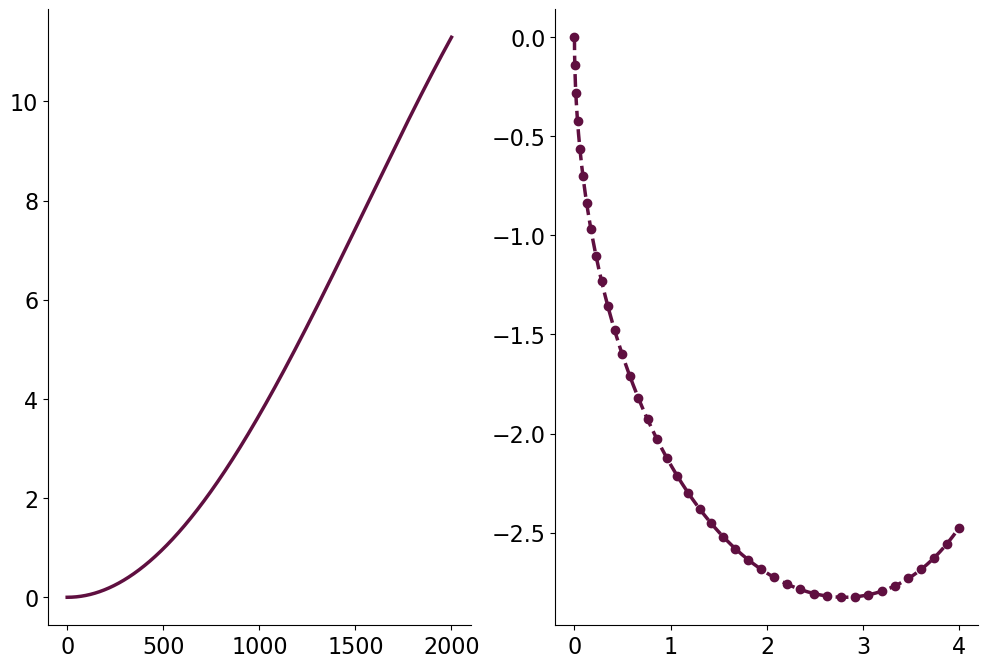

In [74]:
fig, ax = plt.subplots(1, 2)

ax[0].plot(result.times, result.expect[0], label="n")

ax[1].plot(result.expect[1], result.expect[2], ls = "--")
ax[1].plot(result.expect[1][::50], result.expect[2][::50], "o", color = "C0")


In [75]:
H = (resonator_frequency - drive_frequency)* a_dag * a

H += 2 * drive_amplitude * (a_dag + a)


gamma = 0.01
eta = 0.95
c_ops = [np.sqrt(1 - eta) * np.sqrt(gamma) * a]  # collapse operator B
sc_ops = [np.sqrt(eta) * np.sqrt(gamma) * a]  # stochastic collapse operator A

stochastic_result = smesolve(
    H, 
    rho0, 
    np.linspace(*driving_time, simulation_steps), 
    c_ops = c_ops, 
    sc_ops = sc_ops, 
    e_ops = [n, I, Q], 
    # m_ops = [I, Q],
    method = "heterodyne", 
    store_measurement = True, 
    nsubsteps = 5,
    ntraj = 25)

12.0%. Run time:   2.67s. Est. time left: 00:00:00:19
20.0%. Run time:   4.40s. Est. time left: 00:00:00:17
32.0%. Run time:   7.24s. Est. time left: 00:00:00:15
40.0%. Run time:   9.05s. Est. time left: 00:00:00:13
52.0%. Run time:  11.83s. Est. time left: 00:00:00:10
60.0%. Run time:  13.71s. Est. time left: 00:00:00:09
72.0%. Run time:  16.53s. Est. time left: 00:00:00:06
80.0%. Run time:  18.53s. Est. time left: 00:00:00:04
92.0%. Run time:  21.31s. Est. time left: 00:00:00:01
Total run time:  23.20s


/home/johannseverin/anaconda3/envs/qi/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


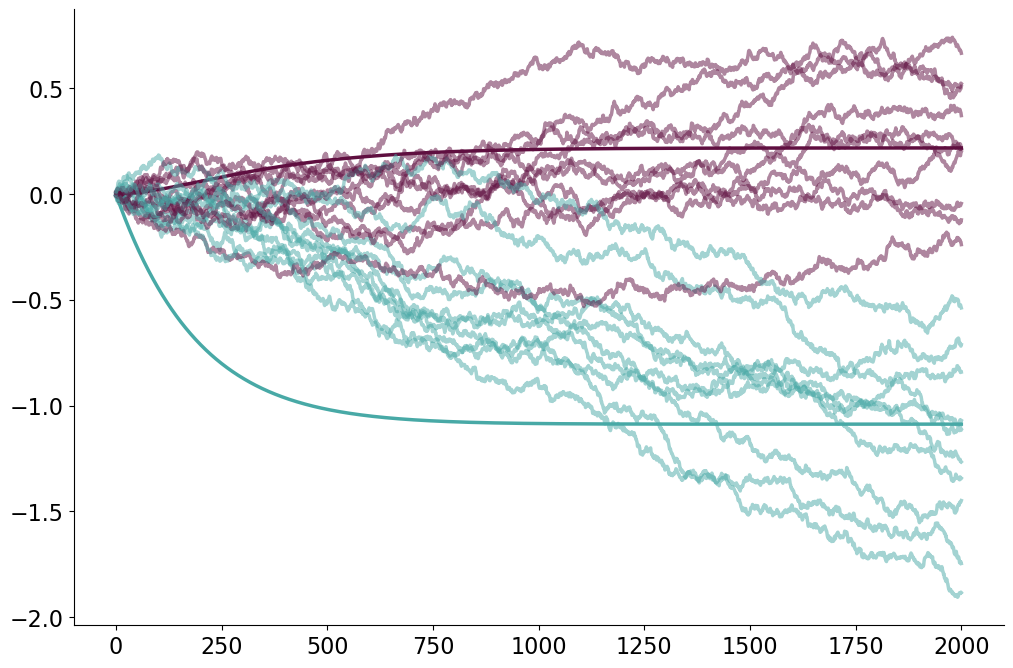

In [80]:
measurements = np.squeeze(np.array(stochastic_result.measurement))

normalization = np.sqrt(gamma * eta) / 20


plt.plot(stochastic_result.expect[1], color = "C0")
plt.plot(stochastic_result.expect[2], color = "C1")
for i in range(10):
    plt.plot(normalization * np.cumsum(measurements[i, :, 0]), color = "C0", alpha = 0.5)
    plt.plot(normalization * np.cumsum(measurements[i, :, 1]), color = "C1", alpha = 0.5)

/home/johannseverin/anaconda3/envs/qi/lib/python3.9/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


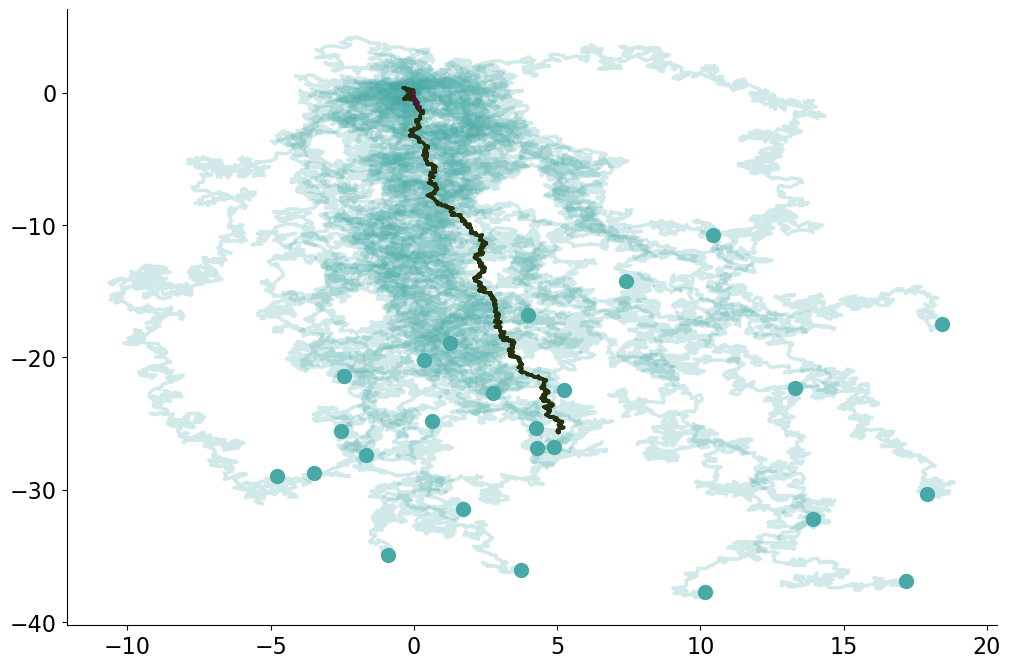

In [77]:
measurements = np.squeeze(np.array(stochastic_result.measurement))

normalization = np.sqrt(gamma * eta)
for i in range(measurements.shape[0]):
    plt.plot(normalization * np.cumsum(measurements[i, :, 0]), normalization * np.cumsum(measurements[i, :, 1]), color = "C1", alpha = 0.25)

plt.scatter(normalization * measurements.sum(axis = 1)[:, 0], normalization * measurements.sum(axis = 1)[:, 1], color = "C1", marker = "o", s = 100)

# plt.plot(normalization * np.cumsum(measurements[], axis = 1).mean(axis = 0), normalization * np.cumsum(measurements.mean(axis = 0)[:, 1]), color = "C1")
plt.plot(normalization * np.cumsum(measurements.mean(axis = 0)[:, 0]), normalization * np.cumsum(measurements.mean(axis = 0)[:, 1]), color = "C2")
plt.plot(stochastic_result.expect[1], stochastic_result.expect[2], color = "C0")

    # plt.plot(, color = "C1", alpha = 0.5)

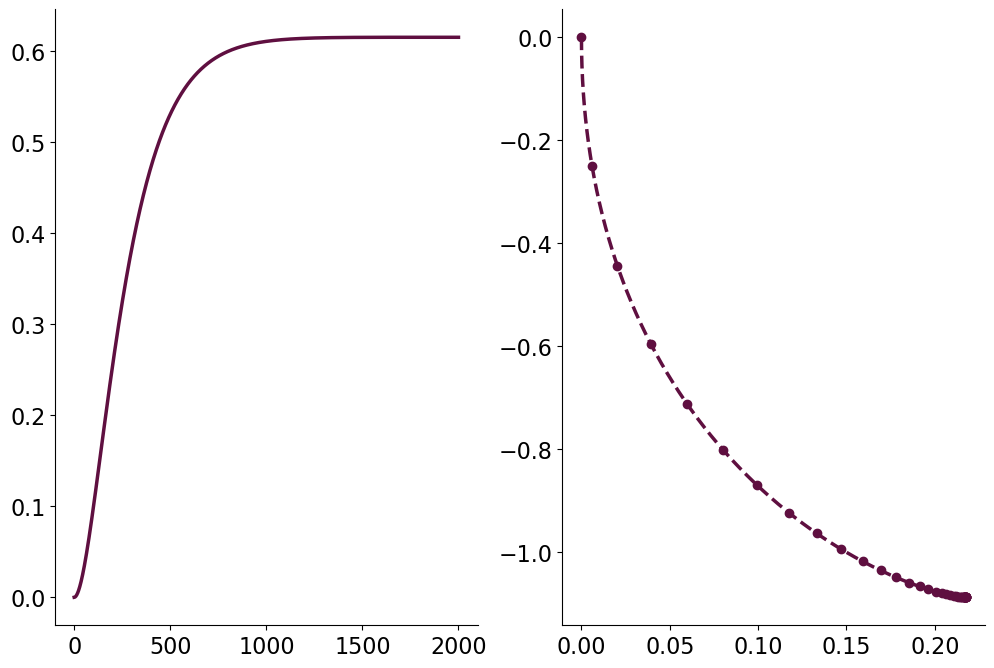

In [78]:
fig, ax = plt.subplots(1, 2)

ax[0].plot(stochastic_result.times, stochastic_result.expect[0], label="n")

ax[1].plot(stochastic_result.expect[1], stochastic_result.expect[2], ls = "--")
ax[1].plot(stochastic_result.expect[1][::50], stochastic_result.expect[2][::50], "o", color = "C0")
